# Camera công nghiệp, ống kính và tính toán FOV


## Mục lục
1. [Giới thiệu](#gioi-thieu)
2. [Camera công nghiệp và đặc điểm](#camera-cong-nghiep-va-dac-diem)
   1. [Camera Hikvision](#camera-hikvision)
   2. [Ống kính công nghiệp](#ong-kinh-cong-nghiep)
3. [Công thức tính FOV của camera](#cong-thuc-tinh-fov-cua-camera)
   1. [Lý thuyết](#ly-thuyet)
   2. [Ví dụ trực quan](#vi-du-truc-quan)
4. [Undistort ảnh với OpenCV sử dụng mẫu bàn cờ](#undistort-anh-voi-opencv-su-dung-mau-ban-co)
   1. [Thu thập ảnh calibration](#thu-thap-anh-calibration)
   2. [Undistort ảnh](#undistort-anh)


## 1: Giới thiệu <a id="gioi-thieu"></a>
Trong bài notebook này, chúng ta sẽ tìm hiểu về:
- **Camera công nghiệp và ống kính công nghiệp**
- **Đặc điểm nổi bật của camera Hikvision**
- **Công thức tính FOV (Field of View) của camera**
- **Cách hiệu chỉnh ảnh bị biến dạng (undistort) với OpenCV sử dụng mẫu bàn cờ (chessboard)**

Chúng ta sẽ thực hiện các ví dụ cụ thể để làm rõ các khái niệm và kỹ thuật trên.


## 2. Camera công nghiệp và đặc điểm <a id="camera-cong-nghiep-va-dac-diem"></a>


### 2.1. Camera Hikvision <a id="camera-hikvision"></a>

 Camera Hikvision là một trong những thương hiệu camera công nghiệp hàng đầu thế giới, được sử dụng rộng rãi trong 
nhiều ứng dụng công nghiệp và an ninh.

### Đặc điểm nổi bật của camera Hikvision:
- **Độ phân giải cao**: Từ 2MP đến 32MP
- **Tốc độ khung hình cao**: Lên đến 120fps ở một số model
- **Kết nối đa dạng**: GigE, USB3.0, Camera Link, CoaXPress
- **Dải nhiệt độ làm việc rộng**: -30°C đến 60°C


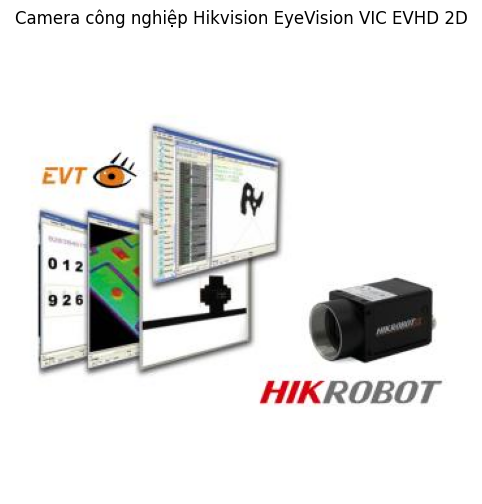

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from io import BytesIO
import requests


# Hiển thị ảnh minh họa camera Hikvision công nghiệp
try:
    url = "https://www.machine-vision-shop.com/images/productimages/smaller/hikvision-evhd-vic-by-evt.jpg"
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize=(10, 6))
    plt.imshow(np.array(img))
    plt.title("Camera công nghiệp Hikvision EyeVision VIC EVHD 2D")
    plt.axis('off')
    plt.show()
except:
    print("Không thể tải hình ảnh minh họa. Vui lòng kiểm tra kết nối internet.")



### 2.2. Ống kính công nghiệp <a id="ong-kinh-cong-nghiep"></a>


### Ống kính công nghiệp có các đặc điểm quan trọng:
- **Tiêu cự (Focal Length)**: Xác định góc nhìn (FOV) của camera
- **Khẩu độ (Aperture/F-stop)**: Kiểm soát lượng ánh sáng đi vào cảm biến
- **Độ phân giải (Resolution)**: Khả năng tái tạo chi tiết
- **Mount type**: C-mount, CS-mount, F-mount, M12-mount...
- **Độ biến dạng (Distortion)**: Mức độ biến dạng hình ảnh
- **Khoảng cách làm việc (Working Distance)**: Khoảng cách từ ống kính đến vật thể



### Loại ống kính thông dụng:
1. **Ống kính cố định (Fixed Focal Length)**
2. **Ống kính zoom (Zoom Lens)**
3. **Ống kính macro (Macro Lens)**
4. **Ống kính telecentric (Telecentric Lens)**
5. **Ống kính fisheye (Fisheye Lens)**

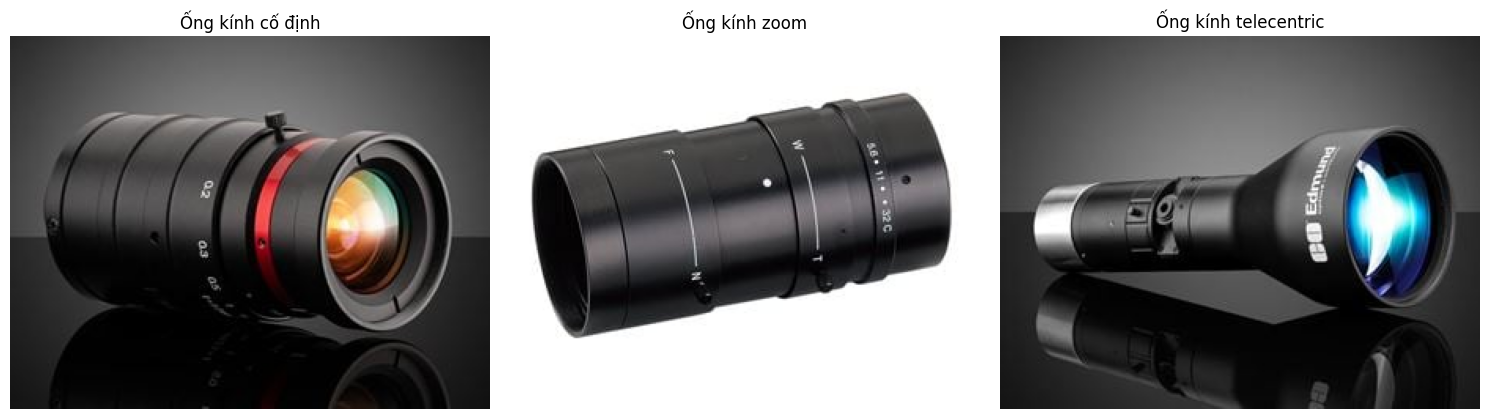

In [6]:

# Hiển thị các loại ống kính công nghiệp
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

try:
    # Ống kính cố định
    url1 = "https://productimages.edmundoptics.com/21434.jpg?w=305&quality=80"
    response = requests.get(url1)
    img1 = Image.open(BytesIO(response.content))
    axes[0].imshow(np.array(img1))
    axes[0].set_title("Ống kính cố định")
    axes[0].axis('off')
    
    # Ống kính zoom
    url2 = "https://productimages.edmundoptics.com/984.jpg?w=305&quality=80"
    response = requests.get(url2)
    img2 = Image.open(BytesIO(response.content))
    axes[1].imshow(np.array(img2))
    axes[1].set_title("Ống kính zoom")
    axes[1].axis('off')
    
    # Ống kính telecentric
    url3 = "https://productimages.edmundoptics.com/20664.jpg?w=305&quality=80"
    response = requests.get(url3)
    img3 = Image.open(BytesIO(response.content))
    axes[2].imshow(np.array(img3))
    axes[2].set_title("Ống kính telecentric")
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()
except:
    print("Không thể tải hình ảnh ống kính. Vui lòng kiểm tra kết nối internet.")



## 3. Công thức tính FOV của camera <a id="cong-thuc-tinh-fov-cua-camera"></a>


### 3.1. Lý thuyết <a id="ly-thuyet"></a>
FOV (Field of View) là góc nhìn của camera, có thể tính toán dựa vào tiêu cự (focal length) và kích thước cảm biến của camera.


### Công thức tính FOV:
1. **FOV_x (theo chiều ngang):**
    FOV_x = 2 × arctan(w/(2f))
    Trong đó:
    - w là chiều rộng cảm biến của camera.
    - f là tiêu cự của camera.

 2. **FOV_y (theo chiều dọc):**
   FOV_y = 2 × arctan(h/(2f))
    Trong đó:
    - h là chiều cao cảm biến của camera.
    - f là tiêu cự của camera.

 3. **Tính WD (Working Distance) từ FOV:**
    - WD = (FOV_width × f) / sensor_width
    - WD = (FOV_height × f) / sensor_height



### 3.2. Ví dụ trực quan <a id="vi-du-truc-quan"></a>

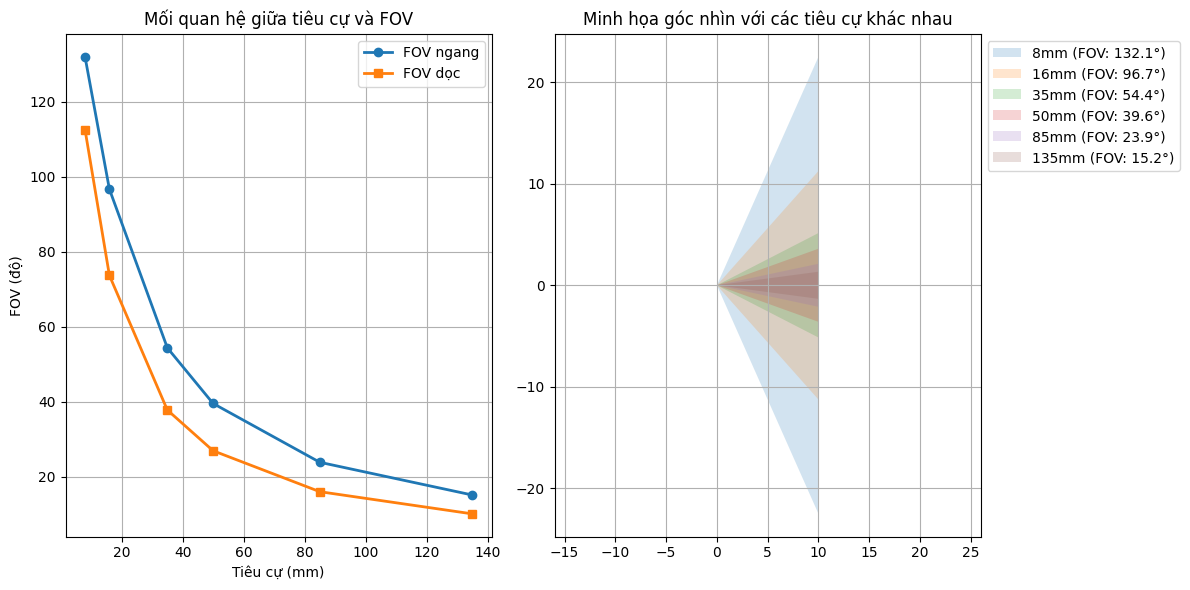

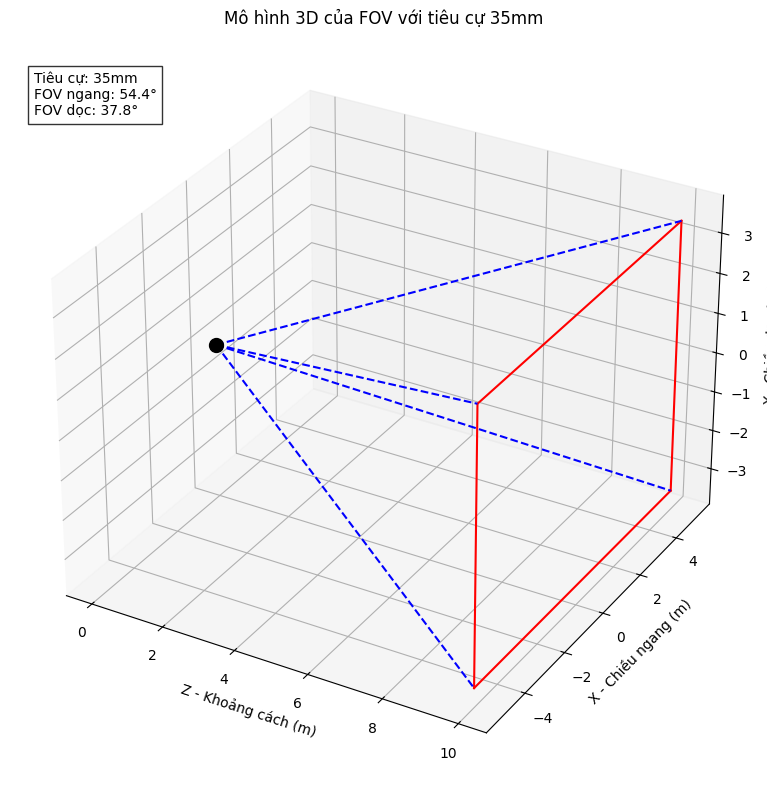

In [8]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

# Hàm tính FOV
def calculate_fov(sensor_size, focal_length):
    # Tính FOV theo độ
    fov_rad = 2 * np.arctan(sensor_size / (2 * focal_length))
    fov_deg = np.degrees(fov_rad)
    return fov_deg

# Hàm tính FOV và visualize
def visualize_fov():
    # Kích thước cảm biến (mm)
    sensor_width = 36  # Full-frame
    sensor_height = 24
    
    # Các tiêu cự khác nhau (mm)
    focal_lengths = [8, 16, 35, 50, 85, 135]
    
    # Tính FOV cho từng tiêu cự
    fov_x_values = [calculate_fov(sensor_width, f) for f in focal_lengths]
    fov_y_values = [calculate_fov(sensor_height, f) for f in focal_lengths]
    
    # Vẽ biểu đồ
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(focal_lengths, fov_x_values, 'o-', linewidth=2, label='FOV ngang')
    plt.plot(focal_lengths, fov_y_values, 's-', linewidth=2, label='FOV dọc')
    plt.xlabel('Tiêu cự (mm)')
    plt.ylabel('FOV (độ)')
    plt.title('Mối quan hệ giữa tiêu cự và FOV')
    plt.grid(True)
    plt.legend()
    
    # Vẽ minh họa góc nhìn
    plt.subplot(1, 2, 2)
    
    # Vẽ camera ở gốc tọa độ
    for f, fov_x in zip(focal_lengths, fov_x_values):
        # Chuyển FOV từ độ sang radian
        fov_rad = np.radians(fov_x)
        
        # Tính toán các điểm để vẽ góc nhìn
        distance = 10  # Khoảng cách tùy ý để vẽ
        width = 2 * distance * np.tan(fov_rad/2)
        
        # Vẽ góc nhìn
        x = [0, distance, distance, 0]
        y = [0, -width/2, width/2, 0]
        plt.fill(x, y, alpha=0.2, label=f'{f}mm (FOV: {fov_x:.1f}°)')
    
    plt.axis('equal')
    plt.grid(True)
    plt.title('Minh họa góc nhìn với các tiêu cự khác nhau')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.tight_layout()
    plt.show()
    
    # Vẽ mô hình 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Chọn một tiêu cự để minh họa
    f = 35  # mm
    fov_x = calculate_fov(sensor_width, f)
    fov_y = calculate_fov(sensor_height, f)
    
    # Chuyển FOV từ độ sang radian
    fov_x_rad = np.radians(fov_x)
    fov_y_rad = np.radians(fov_y)
    
    # Khoảng cách để vẽ
    distance = 10
    
    # Tính toán kích thước hình chữ nhật ở khoảng cách đó
    width = 2 * distance * np.tan(fov_x_rad/2)
    height = 2 * distance * np.tan(fov_y_rad/2)
    
    # Các điểm của hình chữ nhật
    x = [distance, distance, distance, distance]
    y = [-width/2, width/2, width/2, -width/2]
    z = [height/2, height/2, -height/2, -height/2]
    
    # Vẽ các cạnh của hình chữ nhật
    ax.plot([x[0], x[1]], [y[0], y[1]], [z[0], z[1]], 'r-')
    ax.plot([x[1], x[2]], [y[1], y[2]], [z[1], z[2]], 'r-')
    ax.plot([x[2], x[3]], [y[2], y[3]], [z[2], z[3]], 'r-')
    ax.plot([x[3], x[0]], [y[3], y[0]], [z[3], z[0]], 'r-')
    
    # Vẽ các đường từ gốc tọa độ đến các góc của hình chữ nhật
    for i in range(4):
        ax.plot([0, x[i]], [0, y[i]], [0, z[i]], 'b--')
    
    ax.set_xlabel('Z - Khoảng cách (m)')
    ax.set_ylabel('X - Chiều ngang (m)')
    ax.set_zlabel('Y - Chiều dọc (m)')
    ax.set_title(f'Mô hình 3D của FOV với tiêu cự {f}mm')
    
    # Đặt gốc tọa độ tại camera
    ax.scatter([0], [0], [0], color='k', s=100, label='Camera')
    
    # Hiển thị thông tin FOV
    plt.figtext(0.15, 0.85, f'Tiêu cự: {f}mm\nFOV ngang: {fov_x:.1f}°\nFOV dọc: {fov_y:.1f}°', 
                bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

# Vẽ minh họa FOV
visualize_fov()




Tính FOV và khoảng cách làm việc (WD) cho đối tượng kích thước 100mm x 80mm:

Tiêu cự (mm) | FOV ngang (độ) | FOV dọc (độ) | WD cho width (mm) | WD cho height (mm)
------------------------------------------------------------------------------------------
         8.0 |           78.6 |         54.3 |              61.1 |               78.0
        12.0 |           57.3 |         37.7 |              91.6 |              117.1
        16.0 |           44.5 |         28.7 |             122.1 |              156.1
        25.0 |           29.4 |         18.6 |             190.8 |              243.9
        35.0 |           21.2 |         13.4 |             267.2 |              341.5
        50.0 |           14.9 |          9.4 |             381.7 |              487.8


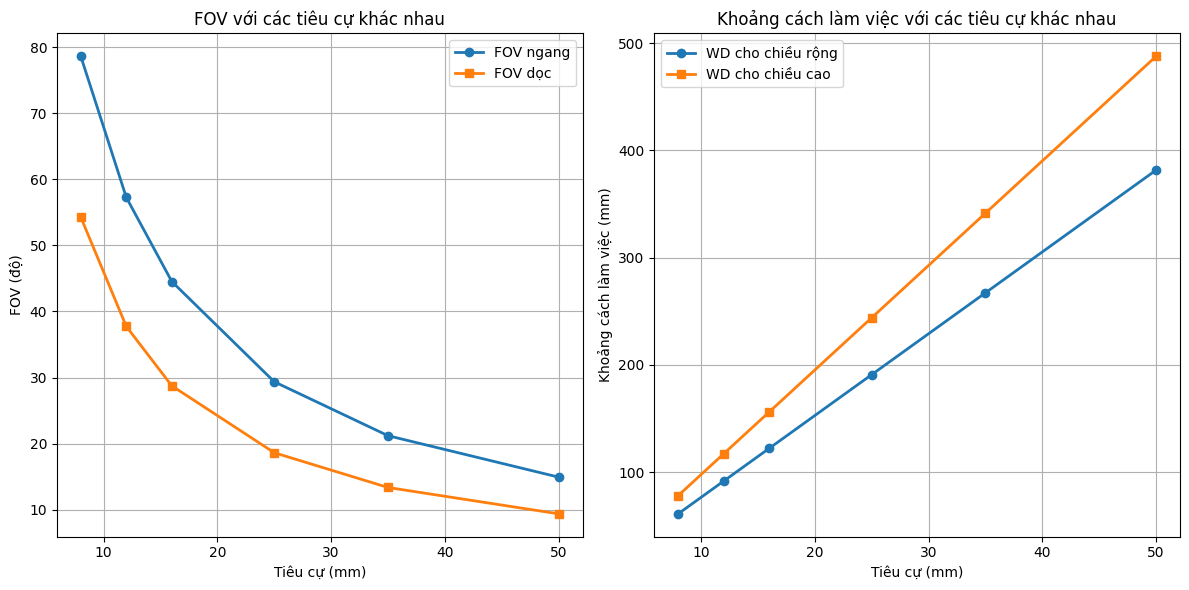

In [9]:
# Ứng dụng thực tế: Tính FOV và khoảng cách làm việc
def calculate_working_distance():
    # Thông số ống kính và cảm biến
    focal_lengths = [8, 12, 16, 25, 35, 50]  # mm
    sensor_width = 13.1  # mm (1" CMOS sensor)
    sensor_height = 8.2  # mm
    
    # Kích thước đối tượng cần kiểm tra
    object_width = 100  # mm
    object_height = 80  # mm
    
    print("Tính FOV và khoảng cách làm việc (WD) cho đối tượng kích thước {}mm x {}mm:".format(object_width, object_height))
    print("\nTiêu cự (mm) | FOV ngang (độ) | FOV dọc (độ) | WD cho width (mm) | WD cho height (mm)")
    print("-" * 90)
    
    for f in focal_lengths:
        # Tính FOV
        fov_x = calculate_fov(sensor_width, f)
        fov_y = calculate_fov(sensor_height, f)
        
        # Tính khoảng cách làm việc
        wd_width = (object_width * f) / sensor_width
        wd_height = (object_height * f) / sensor_height
        
        print(f"{f:12.1f} | {fov_x:14.1f} | {fov_y:12.1f} | {wd_width:17.1f} | {wd_height:18.1f}")
    
    # Vẽ biểu đồ minh họa
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(focal_lengths, [calculate_fov(sensor_width, f) for f in focal_lengths], 'o-', linewidth=2, label='FOV ngang')
    plt.plot(focal_lengths, [calculate_fov(sensor_height, f) for f in focal_lengths], 's-', linewidth=2, label='FOV dọc')
    plt.xlabel('Tiêu cự (mm)')
    plt.ylabel('FOV (độ)')
    plt.title('FOV với các tiêu cự khác nhau')
    plt.grid(True)
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(focal_lengths, [(object_width * f) / sensor_width for f in focal_lengths], 'o-', linewidth=2, label='WD cho chiều rộng')
    plt.plot(focal_lengths, [(object_height * f) / sensor_height for f in focal_lengths], 's-', linewidth=2, label='WD cho chiều cao')
    plt.xlabel('Tiêu cự (mm)')
    plt.ylabel('Khoảng cách làm việc (mm)')
    plt.title('Khoảng cách làm việc với các tiêu cự khác nhau')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
# Tính FOV và khoảng cách làm việc
calculate_working_distance()


## 4. Undistort ảnh với OpenCV sử dụng mẫu bàn cờ <a id="undistort-anh-voi-opencv-su-dung-mau-ban-co"></a>

### 4.1. Thu thập ảnh calibration <a id="thu-thap-anh-calibration"></a>
Để undistort ảnh, trước tiên cần thu thập các ảnh bàn cờ (chessboard) từ nhiều góc độ khác nhau.
Dưới đây là mã để tạo mẫu bàn cờ:

### 4.3. Undistort ảnh <a id="undistort-anh"></a>


Hướng dẫn:
1. Khi chạy hàm calibrate_hikrobot_camera(), chuẩn bị bàn cờ và đặt trước camera
2. Di chuyển bàn cờ đến các vị trí khác nhau (nghiêng, xoay) để chụp ảnh
3. Nhấn 'c' để chụp khi camera nhận diện được bàn cờ
4. Sau khi chụp đủ ảnh, chương trình sẽ hiệu chỉnh camera và hiển thị kết quả
5. Sử dụng undistort_live_feed() để xem kết quả hiệu chỉnh trực tiếp



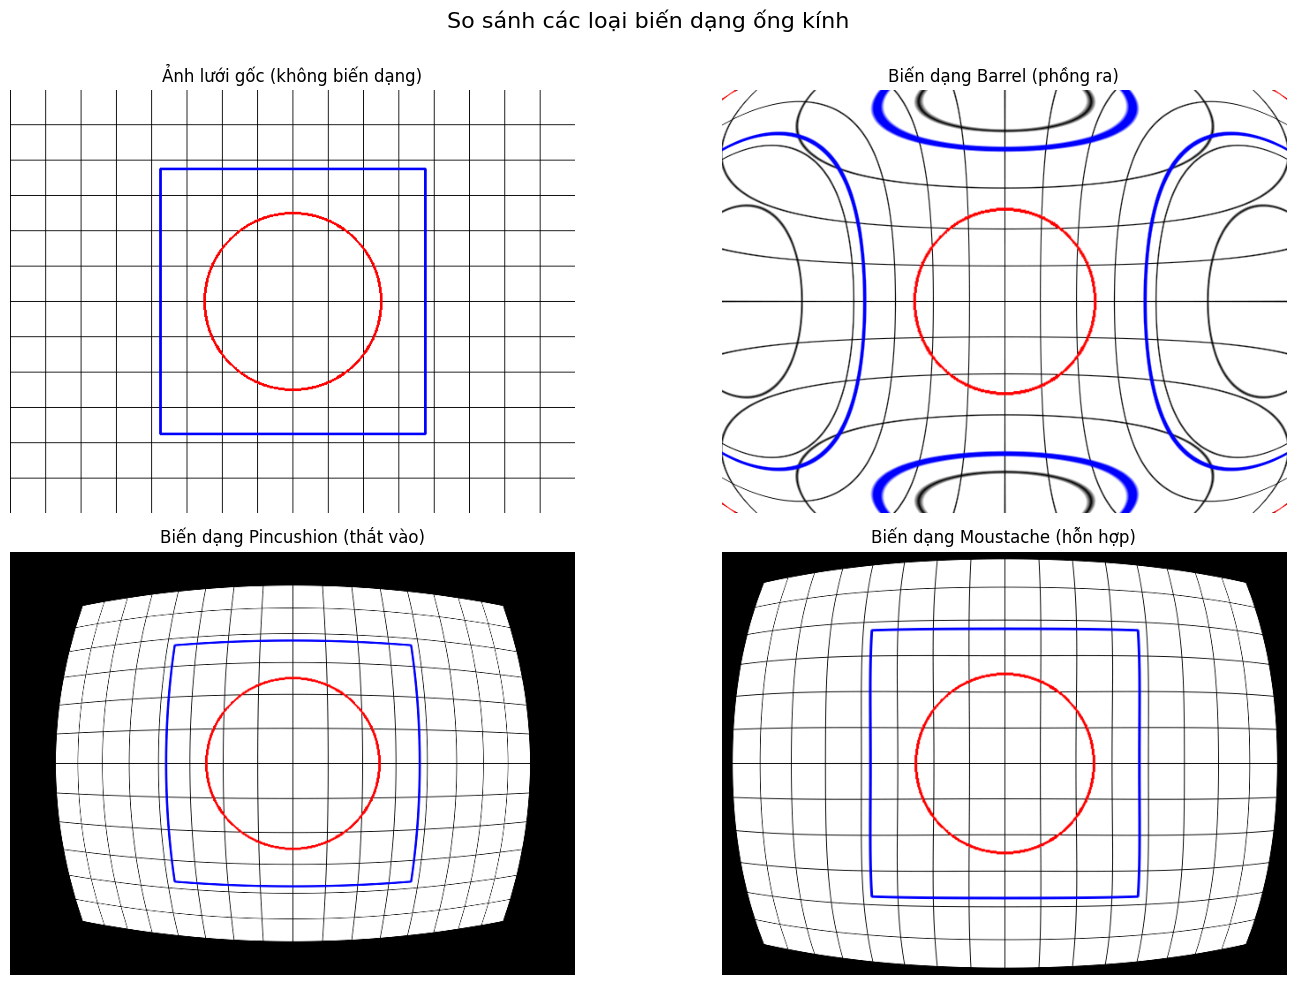

In [22]:
### 4.3. Undistort ảnh

# Undistort ảnh với Hikrobot camera
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})  # Giảm kích thước chữ

def calibrate_hikrobot_camera():
    print("Bắt đầu hiệu chỉnh camera Hikrobot...")
    
    # Kích thước bàn cờ (số ô giao nhau bên trong)
    chessboard_size = (8, 6)
    # Kích thước ô vuông bàn cờ (mm) - điều chỉnh theo kích thước thực tế
    square_size = 25.0
    
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    
    # Chuẩn bị điểm 3D trong không gian thực (X,Y,Z=0)
    objp = np.zeros((chessboard_size[0] * chessboard_size[1], 3), np.float32)
    objp[:, :2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1, 2) * square_size
    
    # Mảng chứa điểm đối tượng và điểm ảnh từ tất cả các hình ảnh
    objpoints = []  # điểm 3D trong không gian thực
    imgpoints = []  # điểm 2D trong mặt phẳng ảnh
    
    try:
        # Kết nối với camera Hikrobot
        # Lưu ý: Cần cài đặt thư viện MvImport và cấu hình đúng
        # Đoạn code dưới đây chỉ là giả định, điều chỉnh theo API thực tế của camera
        
        '''
        # Khởi tạo camera - thay thế bằng mã thực tế cho Hikrobot
        from MvImport.MvCameraControl import *
        
        deviceList = MV_CC_DEVICE_INFO_LIST()
        tlayerType = MV_GIGE_DEVICE | MV_USB_DEVICE
        
        # Enum device
        ret = MvCamera.MV_CC_EnumDevices(tlayerType, deviceList)
        if ret != 0:
            print("Enum devices fail!")
            return
            
        # Chọn camera đầu tiên
        if deviceList.nDeviceNum > 0:
            camera = MvCamera()
            ret = camera.MV_CC_CreateHandle(deviceList.pDeviceInfo[0])
            
            # Mở camera
            ret = camera.MV_CC_OpenDevice(MV_ACCESS_Exclusive, 0)
            
            # Cấu hình camera
            camera.MV_CC_SetEnumValue("TriggerMode", 0)
            
            # Bắt đầu lấy ảnh
            ret = camera.MV_CC_StartGrabbing()
        '''
        
        # Do không có camera Hikrobot thực tế, chúng ta sẽ giả lập bằng cách dùng webcam
        # Trong thực tế, thay thế dòng này bằng code kết nối Hikrobot ở trên
        cap = cv2.VideoCapture(0)
        
        if not cap.isOpened():
            print("Không thể mở camera!")
            return
            
        print("Đã kết nối với camera. Đặt bàn cờ trước camera...")
        print("Nhấn 'c' để chụp ảnh, 'q' để kết thúc")
        
        captured_images = []
        img_count = 0
        max_images = 10
        
        while True:
            # Đọc khung hình
            ret, frame = cap.read()
            if not ret:
                print("Không thể đọc khung hình!")
                break
                
            # Hiển thị khung hình
            display_frame = frame.copy()
            cv2.putText(display_frame, f"Captured: {img_count}/{max_images}", 
                        (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
            cv2.putText(display_frame, "Press 'c' to capture, 'q' to quit", 
                        (20, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
            
            cv2.imshow("Camera Preview", display_frame)
            
            # Xử lý phím nhấn
            key = cv2.waitKey(1)
            if key == ord('q'):
                break
            elif key == ord('c'):
                # Chuyển sang ảnh grayscale
                gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                
                # Tìm các góc bàn cờ
                ret, corners = cv2.findChessboardCorners(gray, chessboard_size, None)
                
                if ret:
                    # Lưu ảnh và hiển thị các góc tìm được
                    objpoints.append(objp)
                    corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
                    imgpoints.append(corners2)
                    
                    # Vẽ và hiển thị các góc
                    cv2.drawChessboardCorners(frame, chessboard_size, corners2, ret)
                    cv2.imshow("Corners Found", frame)
                    cv2.waitKey(500)
                    
                    captured_images.append(frame)
                    img_count += 1
                    print(f"Đã chụp ảnh {img_count}/{max_images}")
                    
                    if img_count >= max_images:
                        print("Đã đạt số lượng ảnh tối đa!")
                        break
                else:
                    print("Không tìm thấy bàn cờ! Vui lòng điều chỉnh vị trí.")
        
        # Đóng camera
        cap.release()
        cv2.destroyAllWindows()
        
        if img_count == 0:
            print("Không có ảnh nào được chụp!")
            return None, None
            
        print(f"Hiệu chỉnh camera với {img_count} ảnh...")
        
        # Thực hiện hiệu chỉnh camera
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, 
                                                          gray.shape[::-1], None, None)
        
        print("Hiệu chỉnh hoàn tất!")
        print("Ma trận camera (Camera Matrix):")
        print(mtx)
        print("\nHệ số biến dạng (Distortion Coefficients):")
        print(dist)
        
        # Lưu thông số hiệu chỉnh
        np.save('hikrobot_camera_matrix.npy', mtx)
        np.save('hikrobot_dist_coeffs.npy', dist)
        
        # Hiển thị kết quả hiệu chỉnh
        plt.figure(figsize=(15, 10))
        
        for i, img in enumerate(captured_images[:5]):
            # Undistort ảnh
            undistorted = cv2.undistort(img, mtx, dist, None, mtx)
            
            # Hiển thị ảnh gốc và ảnh đã hiệu chỉnh
            plt.subplot(2, 5, i+1)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(f"Ảnh gốc {i+1}")
            plt.axis('off')
            
            plt.subplot(2, 5, i+6)
            plt.imshow(cv2.cvtColor(undistorted, cv2.COLOR_BGR2RGB))
            plt.title(f"Đã hiệu chỉnh {i+1}")
            plt.axis('off')
        
        plt.suptitle("So sánh ảnh trước và sau khi hiệu chỉnh", fontsize=16)
        plt.tight_layout()
        plt.subplots_adjust(top=0.9)
        plt.show()
        
        return mtx, dist
        
    except Exception as e:
        print(f"Lỗi: {e}")
        return None, None

def undistort_live_feed():
    try:
        # Tải ma trận camera và hệ số biến dạng
        try:
            mtx = np.load('hikrobot_camera_matrix.npy')
            dist = np.load('hikrobot_dist_coeffs.npy')
            print("Đã tải thông số hiệu chỉnh camera")
        except:
            print("Không tìm thấy file thông số hiệu chỉnh! Vui lòng hiệu chỉnh camera trước.")
            return
        
        # Kết nối với camera (thay bằng mã kết nối Hikrobot trong thực tế)
        cap = cv2.VideoCapture(0)
        
        if not cap.isOpened():
            print("Không thể mở camera!")
            return
            
        print("Đang chạy hiệu chỉnh trực tiếp... Nhấn 'q' để thoát")
        
        while True:
            # Đọc khung hình
            ret, frame = cap.read()
            if not ret:
                print("Không thể đọc khung hình!")
                break
                
            # Undistort khung hình
            undistorted = cv2.undistort(frame, mtx, dist, None, mtx)
            
            # Hiển thị khung hình gốc và đã hiệu chỉnh
            combined = np.hstack((frame, undistorted))
            cv2.putText(combined, "Gốc", (50, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            cv2.putText(combined, "Đã hiệu chỉnh", (frame.shape[1] + 50, 30), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            
            cv2.imshow("So sánh khung hình gốc vs đã hiệu chỉnh", combined)
            
            if cv2.waitKey(1) == ord('q'):
                break
                
        # Đóng camera
        cap.release()
        cv2.destroyAllWindows()
        
    except Exception as e:
        print(f"Lỗi: {e}")

# Thực hiện hiệu chỉnh camera Hikrobot và hiển thị kết quả
print("""
Hướng dẫn:
1. Khi chạy hàm calibrate_hikrobot_camera(), chuẩn bị bàn cờ và đặt trước camera
2. Di chuyển bàn cờ đến các vị trí khác nhau (nghiêng, xoay) để chụp ảnh
3. Nhấn 'c' để chụp khi camera nhận diện được bàn cờ
4. Sau khi chụp đủ ảnh, chương trình sẽ hiệu chỉnh camera và hiển thị kết quả
5. Sử dụng undistort_live_feed() để xem kết quả hiệu chỉnh trực tiếp
""")

# Gọi các hàm để thực hiện hiệu chỉnh
# Bỏ comment dòng dưới để hiệu chỉnh camera
# mtx, dist = calibrate_hikrobot_camera()

# Bỏ comment dòng dưới để xem kết quả hiệu chỉnh trực tiếp
# undistort_live_feed()

# Visualize distortion effects
def visualize_distortion_difference():
    # Tạo ảnh lưới
    width, height = 640, 480
    grid_img = np.ones((height, width, 3), dtype=np.uint8) * 255
    
    # Vẽ lưới
    for x in range(0, width, 40):
        cv2.line(grid_img, (x, 0), (x, height), (0, 0, 0), 1)
    
    for y in range(0, height, 40):
        cv2.line(grid_img, (0, y), (width, y), (0, 0, 0), 1)
    
    # Thêm hình tròn và vuông vào lưới
    cv2.circle(grid_img, (width//2, height//2), 100, (0, 0, 255), 2)
    cv2.rectangle(grid_img, (width//2-150, height//2-150), 
                 (width//2+150, height//2+150), (255, 0, 0), 2)
    
    # Tạo các loại biến dạng khác nhau
    camera_matrix = np.array([[width//2, 0, width//2],
                             [0, height//2, height//2],
                             [0, 0, 1]], dtype=np.float32)
    
    # Hiển thị ảnh so sánh
    plt.figure(figsize=(15, 10))
    
    # Ảnh gốc
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(grid_img, cv2.COLOR_BGR2RGB))
    plt.title("Ảnh lưới gốc (không biến dạng)")
    plt.axis('off')
    
    # Biến dạng Barrel
    barrel_dist = np.array([0.2, 0.1, 0, 0, 0], dtype=np.float32)
    barrel_img = cv2.undistort(grid_img, camera_matrix, -barrel_dist)
    plt.subplot(2, 2, 2)
    plt.imshow(cv2.cvtColor(barrel_img, cv2.COLOR_BGR2RGB))
    plt.title("Biến dạng Barrel (phồng ra)")
    plt.axis('off')
    
    # Biến dạng Pincushion
    pincushion_dist = np.array([-0.2, -0.1, 0, 0, 0], dtype=np.float32)
    pincushion_img = cv2.undistort(grid_img, camera_matrix, -pincushion_dist)
    plt.subplot(2, 2, 3)
    plt.imshow(cv2.cvtColor(pincushion_img, cv2.COLOR_BGR2RGB))
    plt.title("Biến dạng Pincushion (thắt vào)")
    plt.axis('off')
    
    # Biến dạng Moustache (hỗn hợp)
    moustache_dist = np.array([0.1, -0.15, 0, 0, 0], dtype=np.float32)
    moustache_img = cv2.undistort(grid_img, camera_matrix, -moustache_dist)
    plt.subplot(2, 2, 4)
    plt.imshow(cv2.cvtColor(moustache_img, cv2.COLOR_BGR2RGB))
    plt.title("Biến dạng Moustache (hỗn hợp)")
    plt.axis('off')
    
    plt.suptitle("So sánh các loại biến dạng ống kính", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Hiển thị so sánh các loại biến dạng
visualize_distortion_difference()


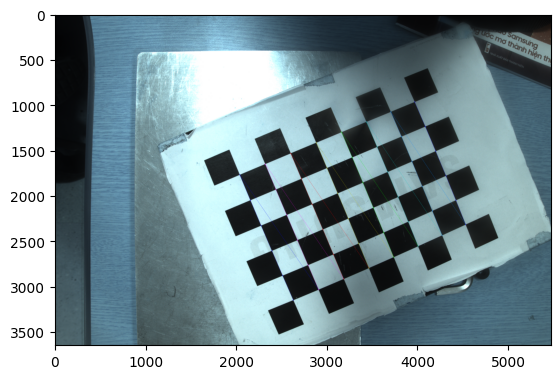

In [2]:
image_dir = "image"

import numpy as np
import cv2 as cv
import glob

import matplotlib.pyplot as plt

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:6,0:8].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob(f'{image_dir}/*.bmp')

for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (6,8), None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        cv.drawChessboardCorners(img, (6,8), corners2, ret)
        plt.imshow(img)

assert len(imgpoints) > 15, "Num image must be > 15"

cv.destroyAllWindows()